In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
plt.style.use('ggplot')
plt.style.use('seaborn-bright')

In [3]:
voice_usage_info = pd.read_csv("data/new/IDD_Incoming.csv")

voice_usage_info

,event_source.hash,ym,incoming_country,call_count,volume,event_type_id,RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,MODEL,EQUP_INDEX,
0,40316888f773134364ae711ebdfdc791,201901,Telstra/Australia Incoming II,3,681,6,R-RM,MV-GDM-NODE,MSAG5200-ISL,48249,MSAN-OG,1,
1,40316888f773134364ae711ebdfdc791,201904,STC/Saudi Arabia Incoming II,1,219,6,R-RM,MV-GDM-NODE,MSAG5200-ISL,48249,MSAN-OG,1,
2,40316888f773134364ae711ebdfdc791,201906,CTGL/China Incoming II,1,11,6,R-RM,MV-GDM-NODE,MSAG5200-ISL,48249,MSAN-OG,1,
3,c3db6a32b42743fc2e0284f8e6c7515e,201912,STC/Saudi Arabia Incoming II,1,15,6,R-AG,AG-PNP-NODE,ZXDSL9806H-ISL,52976,MSAN-OP,1,
4,c3db6a32b42743fc2e0284f8e6c7515e,201904,Telstra/Australia Incoming II,2,56,6,R-AG,AG-PNP-NODE,ZXDSL9806H-ISL,52976,MSAN-OP,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18602,c65cbf44d0aa63364dd7344813454e74,201904,DU/UAE Incoming II,1,8,6,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,MSAN-OG,1,
18603,c65cbf44d0aa63364dd7344813454e74,201905,HGC/HK Incoming II,1,6,6,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,MSAN-OG,1,
18604,c65cbf44d0aa63364dd7344813454e74,201903,Telstra/Australia Incoming II,1,6,6,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,MSAN-OG,1,
18605,c65cbf44d0aa63364dd7344813454e74,201811,Orange/France Incoming II,1,2,6,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,MSAN-OG,1,


In [4]:
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating Call Count/Duration - bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# User profile dim table
# visualize and analyze data

In [5]:
voice_usage_info = voice_usage_info.drop_duplicates(["event_source.hash","ym","incoming_country"], keep="last")
voice_usage_info.drop([" "],axis=1,inplace=True)
voice_usage_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18607 entries, 0 to 18606
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  18607 non-null  object
 1   ym                 18607 non-null  int64 
 2   incoming_country   18607 non-null  object
 3   call_count         18607 non-null  int64 
 4   volume             18607 non-null  int64 
 5   event_type_id      18607 non-null  int64 
 6   RTOM_CODE          18607 non-null  object
 7   LOCATION_CODE      18607 non-null  object
 8   MSAN               18607 non-null  object
 9   EQUP_ID            18607 non-null  int64 
 10  MODEL              18607 non-null  object
 11  EQUP_INDEX         18607 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.8+ MB


In [6]:
voice_usage_info.rename(columns={'volume': 'duration','ym':'year-month'}, inplace=True)

In [7]:
voice_usage_info.isnull().sum(axis=0)

event_source.hash    0
year-month           0
incoming_country     0
call_count           0
duration             0
event_type_id        0
RTOM_CODE            0
LOCATION_CODE        0
MSAN                 0
EQUP_ID              0
MODEL                0
EQUP_INDEX           0
dtype: int64

In [8]:
voice_usage_info['duration'].fillna(0)
voice_usage_info['call_count'].fillna(0)

0        3
1        1
2        1
3        1
4        2
        ..
18602    1
18603    1
18604    1
18605    1
18606    1
Name: call_count, Length: 18607, dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Call Counts/Duration
- 3. Usage Rank
- 4. Labling usage

In [9]:
voice_usage = voice_usage_info[['event_source.hash','call_count','duration','year-month']]

### IDD Usage Trend Analysis

In [10]:
voice_usage_for_plot = voice_usage
voice_usage_for_plot["year-month"] = voice_usage_for_plot["year-month"].astype("category")

<ipython-input-10-6904f4f60890>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_usage_for_plot["year-month"] = voice_usage_for_plot["year-month"].astype("category")


Text(0.5, 0.98, 'Call Duration trend')

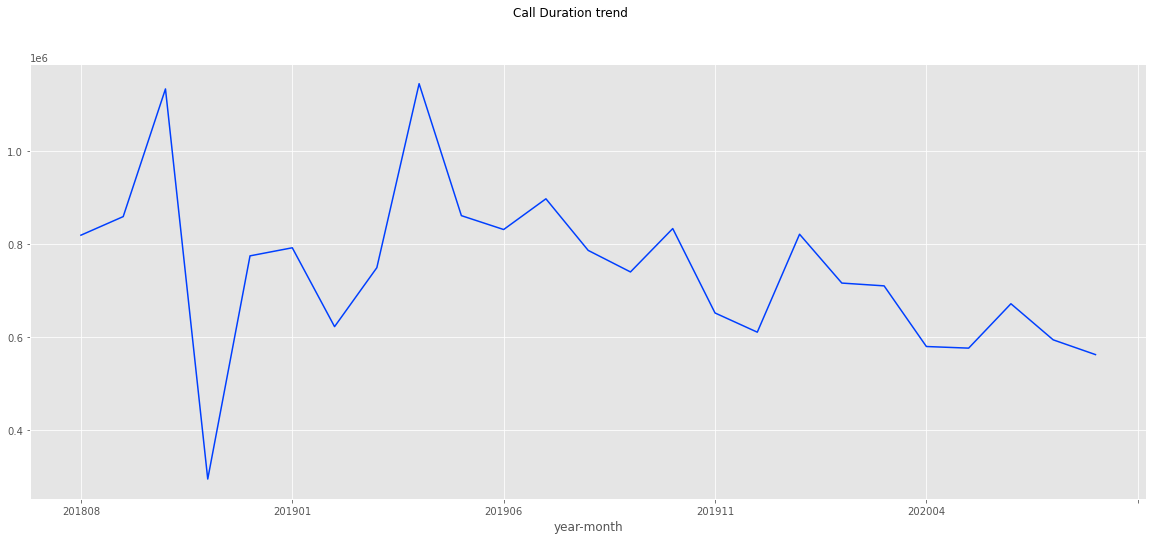

In [38]:
plt.figure(figsize=(20,8))
voice_usage_for_plot.groupby("year-month").sum()["duration"].plot()
plt.suptitle("Call Duration trend")

Text(0.5, 0.98, 'Call Counts trend')

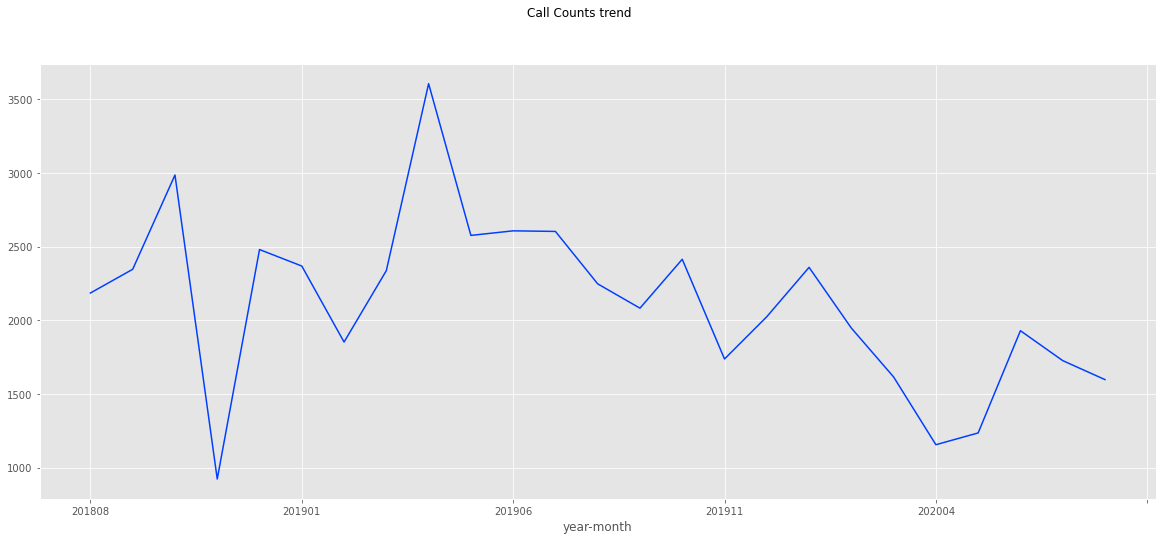

In [39]:
plt.figure(figsize=(20,8))
voice_usage_for_plot.groupby("year-month").sum()["call_count"].plot()
plt.suptitle("Call Counts trend")

In [23]:
pivot_voice_usage_info = pd.pivot_table(voice_usage,index=['event_source.hash'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_voice_usage_info

call_count                              \
year-month                           201808 201809 201810 201811 201812   
event_source.hash                                                         
002fb47f60400713c854b0f69ff78c0a          1      0      0      0      0   
006be321aad541ff1d6c32a43dd7cdde          1      0      0      0      0   
007400db8afa996e788d23986739f3db          0      0      0      0      1   
00768613dcde5cd5723a25a7234b9a9f          0      0      0      0      2   
009f305bf85a71012c0e343233e611ba          1      9     23      1     12   
...                                     ...    ...    ...    ...    ...   
ff1093d5ef61bf46f8c88e9b7614e311          0      0      0      3      0   
ff445f580f7525bd9f1455d6b09704cd          0      0      0      0      0   
ff7e0f4edb7b39b683b9134af37fc4d3         31     29      7      0      7   
ffb4fa6778bc5b3d9c858f5f4fa1e0c2          0      0      0      0      0   
ffd96f173d6cd683bf3384bdc2f99713          0      2      2      5      9   

                                                                     ...  \
year-month                       201901 201902 201903 201904 201905  ...   
event_source.hash                                                    ...   
002fb47f60400713c854b0f69ff78c0a      0      0      0      0      0  ...   
006be321aad541ff1d6c32a43dd7cdde      0      0      0      0      0  ...   
007400db8afa996e788d23986739f3db      2      0      1      1      1  ...   
00768613dcde5cd5723a25a7234b9a9f      1      0      1      0      1  ...   
009f305bf85a71012c0e343233e611ba     20     10     17      6      7  ...   
...                                 ...    ...    ...    ...    ...  ...   
ff1093d5ef61bf46f8c88e9b7614e311      0      0      0      0      0  ...   
ff445f580f7525bd9f1455d6b09704cd      2      0      1      2      0  ...   
ff7e0f4edb7b39b683b9134af37fc4d3      8      6     13     25     11  ...   
ffb4fa6778bc5b3d9c858f5f4fa1e0c2      0      0      0      0      0  ...   
ffd96f173d6cd683bf3384bdc2f99713      7      0      3      9      3  ...   

                                 duration                                     \
year-month                         201911 201912 202001 202002 202003 202004   
event_source.hash                                                              
002fb47f60400713c854b0f69ff78c0a        0      0      0      0      0      0   
006be321aad541ff1d6c32a43dd7cdde        0      0      0      0      0      0   
007400db8afa996e788d23986739f3db        0     10      0    124      0      0   
00768613dcde5cd5723a25a7234b9a9f        0      0      0      0      0      0   
009f305bf85a71012c0e343233e611ba      549   2153   4492   3460   1417      0   
...                                   ...    ...    ...    ...    ...    ...   
ff1093d5ef61bf46f8c88e9b7614e311        0      0      0      0      0      0   
ff445f580f7525bd9f1455d6b09704cd        0    291      0    688      0      0   
ff7e0f4edb7b39b683b9134af37fc4d3     2263   2560   2345   7142   3802   7418   
ffb4fa6778bc5b3d9c858f5f4fa1e0c2        0      0      0      0     60      0   
ffd96f173d6cd683bf3384bdc2f99713        0     25    114     92      0    745   

                                                              
year-month                       202005 202006 202007 202008  
event_source.hash                                             
002fb47f60400713c854b0f69ff78c0a      0     11      0      0  
006be321aad541ff1d6c32a43dd7cdde      0      0      0      0  
007400db8afa996e788d23986739f3db      0      0      0      0  
00768613dcde5cd5723a25a7234b9a9f      0      0      0      0  
009f305bf85a71012c0e343233e611ba    319   1935   4046   3057  
...                                 ...    ...    ...    ...  
ff1093d5ef61bf46f8c88e9b7614e311      0      0      0      0  
ff445f580f7525bd9f1455d6b09704cd      0      0      0      0  
ff7e0f4edb7b39b683b9134af37fc4d3  24773   5313   4466   8820  
ffb4fa6778bc5b3d9c858f5f4fa1e0c2      0 

In [24]:
voice_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,call_count,duration,year-month
count,18607.00000,18607.00000,18607.00000
mean,2.84490,1001.28532,201909.52502
std,6.16588,2489.60156,65.35724
min,1.00000,1.00000,201808.00000
25%,1.00000,73.50000,201901.00000
50%,1.00000,297.00000,201906.00000
75%,3.00000,943.00000,201912.00000
max,314.00000,74330.00000,202008.00000


In [25]:
# Freedman-Diaconis’s Rule for binnig
hist_values = np.histogram_bin_edges(voice_usage["call_count"].values,bins="fd")
hist_values

array([  1.        ,   1.1509161 ,   1.30183221, ..., 313.69816779,
       313.8490839 , 314.        ])

In [26]:
# binning call_count
count_bins = [0,2,4,100,314]
for col in pivot_voice_usage_info['call_count'].columns:
    pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)
pivot_voice_usage_info['call_count']

<ipython-input-26-5ae1f956ffb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)


year-month,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,...,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source.hash,,,,,,,,,,,,,,,,,,,,,
002fb47f60400713c854b0f69ff78c0a,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
006be321aad541ff1d6c32a43dd7cdde,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007400db8afa996e788d23986739f3db,0,0,0,0,1,1,0,1,1,1,...,0,1,0,1,0,0,0,0,0,0
00768613dcde5cd5723a25a7234b9a9f,0,0,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
009f305bf85a71012c0e343233e611ba,1,3,3,1,3,3,3,3,3,3,...,3,3,3,3,3,0,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff1093d5ef61bf46f8c88e9b7614e311,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ff445f580f7525bd9f1455d6b09704cd,0,0,0,0,0,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,0
ff7e0f4edb7b39b683b9134af37fc4d3,3,3,3,0,3,3,3,3,3,3,...,3,3,1,3,3,3,3,3,1,3


In [27]:
# binning duration
duration_bins = [0, 300, 960, 1920,58789]
for col in pivot_voice_usage_info['duration'].columns:
    pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)
pivot_voice_usage_info['duration']

<ipython-input-27-b3e77ef6f307>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)


year-month,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,...,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source.hash,,,,,,,,,,,,,,,,,,,,,
002fb47f60400713c854b0f69ff78c0a,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
006be321aad541ff1d6c32a43dd7cdde,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007400db8afa996e788d23986739f3db,0,0,0,0,1,2,0,1,1,1,...,0,1,0,1,0,0,0,0,0,0
00768613dcde5cd5723a25a7234b9a9f,0,0,0,0,1,2,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0
009f305bf85a71012c0e343233e611ba,1,2,4,2,4,4,3,4,3,3,...,2,4,4,4,3,0,2,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff1093d5ef61bf46f8c88e9b7614e311,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ff445f580f7525bd9f1455d6b09704cd,0,0,0,0,0,1,0,1,2,0,...,0,1,0,2,0,0,0,0,0,0
ff7e0f4edb7b39b683b9134af37fc4d3,4,4,4,0,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [28]:
year_month_list = pivot_voice_usage_info['call_count'].columns

In [29]:
# multplying bins to get usage rating
for col in year_month_list:
    pivot_voice_usage_info[col] = pivot_voice_usage_info['call_count'][col]  * pivot_voice_usage_info['duration'][col]

## ToDO
- find a different approach other than product

### Justification
- 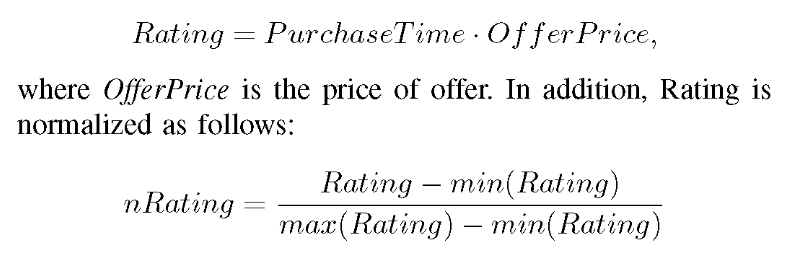
https://doi.org/10.1109/ICCE48956.2021.9352111, 2021  (Pham, C. D., Anh Chu, T., Pham, H. H., Linh Dao, M., Pham, T. S., Hung Trinh, V., & Nguyen, D. H. A recommendation system for offers in telecommunications)
- http://www.utstat.toronto.edu/~brunner/DataAnalysisText/Interactions.pdf

### More advanced methods
- Dimension reduction approaches?

### Usage ratings for year-month

In [30]:
pivot_voice_usage_info = pivot_voice_usage_info.drop(['call_count','duration'], axis=1)
pivot_voice_usage_info

,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,...,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
year-month,,,,,,,,,,,...,,,,,,,,,,
event_source.hash,,,,,,,,,,,,,,,,,,,,,
002fb47f60400713c854b0f69ff78c0a,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
006be321aad541ff1d6c32a43dd7cdde,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007400db8afa996e788d23986739f3db,0,0,0,0,1,2,0,1,1,1,...,0,1,0,1,0,0,0,0,0,0
00768613dcde5cd5723a25a7234b9a9f,0,0,0,0,1,2,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0
009f305bf85a71012c0e343233e611ba,1,6,12,2,12,12,9,12,9,9,...,6,12,12,12,9,0,6,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff1093d5ef61bf46f8c88e9b7614e311,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ff445f580f7525bd9f1455d6b09704cd,0,0,0,0,0,1,0,1,2,0,...,0,1,0,2,0,0,0,0,0,0


In [31]:
pivot_voice_usage_info.T.reset_index(drop=True).T
pivot_voice_usage_info.columns=year_month_list

In [32]:
# scaling usage rating
scaler = MinMaxScaler()
for col in year_month_list:
    pivot_voice_usage_info[col] = scaler.fit_transform(pivot_voice_usage_info[col].values.reshape(-1,1))

<AxesSubplot:xlabel='year-month', ylabel='event_source.hash'>

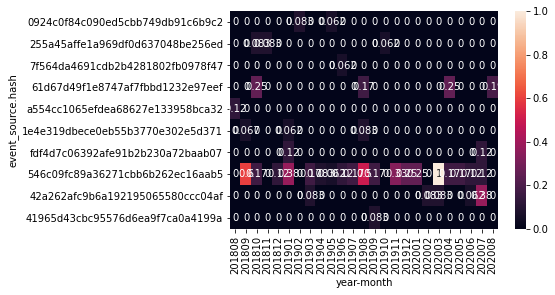

In [33]:
sns.heatmap(pivot_voice_usage_info[year_month_list].sample(n=10), annot=True)

In [34]:
pivot_voice_usage_info['Usage_Rating_Scaled'] = pivot_voice_usage_info[year_month_list].sum(axis=1)/len(year_month_list)
pivot_voice_usage_info

year-month,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,...,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
event_source.hash,,,,,,,,,,,,,,,,,,,,,
002fb47f60400713c854b0f69ff78c0a,0.1250,0.000000,0.000000,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,0.0000,...,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0625,0.0000,0.0000,0.012500
006be321aad541ff1d6c32a43dd7cdde,0.0625,0.000000,0.000000,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,0.0000,...,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.002500
007400db8afa996e788d23986739f3db,0.0000,0.000000,0.000000,0.000000,0.0625,0.1250,0.00,0.083333,0.083333,0.0625,...,0.0625,0.0000,0.083333,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.045833
00768613dcde5cd5723a25a7234b9a9f,0.0000,0.000000,0.000000,0.000000,0.0625,0.1250,0.00,0.166667,0.000000,0.1250,...,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.019167
009f305bf85a71012c0e343233e611ba,0.0625,0.400000,1.000000,0.166667,0.7500,0.7500,0.75,1.000000,0.750000,0.5625,...,0.7500,0.7500,1.000000,0.750000,0.000000,0.500000,0.7500,0.7500,0.7500,0.687667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff1093d5ef61bf46f8c88e9b7614e311,0.0000,0.000000,0.000000,0.166667,0.0000,0.0000,0.00,0.000000,0.000000,0.0000,...,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.006667
ff445f580f7525bd9f1455d6b09704cd,0.0000,0.000000,0.000000,0.000000,0.0000,0.0625,0.00,0.083333,0.166667,0.0000,...,0.0625,0.0000,0.166667,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.021667
ff7e0f4edb7b39b683b9134af37fc4d3,0.7500,0.800000,1.000000,0.000000,0.7500,0.7500,1.00,1.000000,1.000000,0.7500,...,0.7500,0.2500,1.000000,1.000000,1.000000,1.000000,0.7500,0.2500,0.7500,0.802000


### Finding Outliers

<AxesSubplot:>

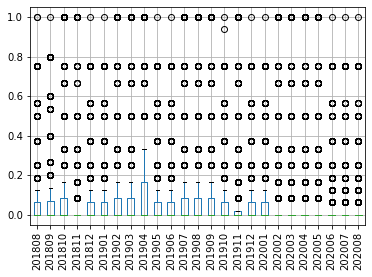

In [35]:
pivot_voice_usage_info.boxplot(column=[int(x) for x in year_month_list], rot=90)

<AxesSubplot:ylabel='year-month'>

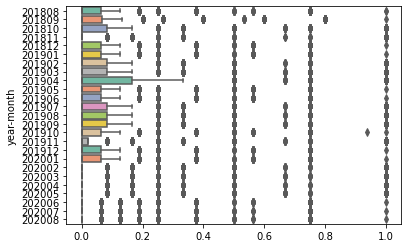

In [36]:
ax = sns.boxplot(data=pivot_voice_usage_info[[int(x) for x in year_month_list]], orient="h", palette="Set2")
ax

<AxesSubplot:ylabel='Density'>

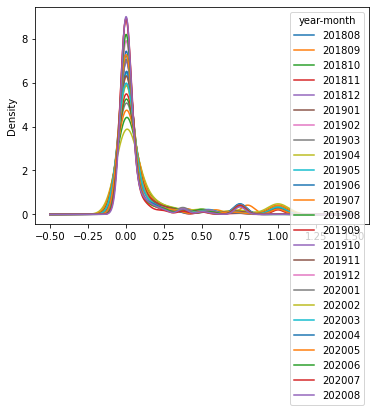

In [37]:
pivot_voice_usage_info[[int(x) for x in year_month_list]].plot(kind = 'density')

## Three quantitative methods commonly used in statistics for the detection of univariate outliers:
- Tukey’s box plot method
- Internally studentized residuals (AKA z-score method)
- Median Absolute Deviation method

### 1) Tukey’s box plot method
- Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.    
    
- IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile
- Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]
- Outer fence = [Q1–3*IQR, Q3+3*IQR]

In [38]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    outliers_prob_indexes = []
    outliers_poss_indexes = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob_indexes.append(index)
            outliers_prob.append(x)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss_indexes.append(index)
            outliers_poss.append(x)
    # returns indexes of the rows with outliers
    return outliers_prob, outliers_prob_indexes, outliers_poss, outliers_poss_indexes

In [39]:
pr_col_threshold = []
po_col_threshold = []
for col in year_month_list:
    pr_col, pr_col_indexes, po_col, po_col_indexes = tukeys_method(pivot_voice_usage_info, int(col))
    pr_col_threshold.append({col: {"threshold": min(pr_col), "count": len(pr_col)}})
    po_col_threshold.append({col: {"threshold": min(po_col), "count": len(po_col)}})
    print()
    print(f"Probable Outliers for {col}---->\n", pr_col)
    print(len(pr_col))
    print()
    print(f"Possible Outliers for {col}----->\n", po_col)
    print(len(po_col))
    print()


Probable Outliers for 201808---->
 [0.75, 0.5, 0.25, 0.25, 0.375, 0.25, 0.375, 0.75, 0.375, 0.75, 0.75, 0.25, 0.25, 0.25, 0.375, 0.75, 0.75, 0.75, 0.5, 1.0, 0.25, 0.375, 0.75, 0.25, 0.375, 0.5, 0.375, 0.375, 0.375, 0.375, 0.75, 0.75, 0.375, 0.5625, 0.5625, 0.75, 0.25, 0.25, 0.25, 0.75, 0.75, 0.25, 0.25, 0.75, 0.25, 0.75, 0.25, 0.75, 0.5625, 0.75, 0.5, 0.25, 0.75, 0.375, 0.75, 0.375, 0.375, 0.75, 0.75, 0.75, 0.5, 0.375, 0.75, 0.75, 0.375, 0.375, 0.375, 0.375, 0.75, 0.75, 0.75, 0.375, 0.75, 0.25, 0.75, 0.375, 0.25, 0.375, 0.75, 0.75, 0.375, 0.25, 0.375, 0.75, 0.25, 0.375, 0.75, 0.75, 0.375, 0.375, 0.25, 0.5, 0.25, 0.75, 0.25, 0.375, 0.75, 0.25, 0.25, 0.375, 0.5625, 0.25, 0.75, 0.375, 0.75, 0.25, 0.5625, 0.375, 0.5625, 0.5625, 0.375, 0.75, 0.75, 0.375, 0.5625, 0.75, 0.375, 0.5625, 0.375, 0.75, 0.25, 0.5, 0.5, 0.75, 0.75, 0.25, 0.75, 0.5625, 0.75, 0.75, 0.5625, 0.75, 0.5625, 0.375, 0.75, 0.75, 0.75, 0.375, 0.25, 0.75, 0.5, 0.75, 0.25, 0.75, 0.75, 0.25, 0.375, 0.75, 0.5625, 0.25, 0.75, 0.7

In [40]:
pr_col_threshold

[{201808: {'threshold': 0.25, 'count': 180}},
 {201809: {'threshold': 0.26666666666666666, 'count': 215}},
 {201810: {'threshold': 0.3333333333333333, 'count': 254}},
 {201811: {'threshold': 0.0, 'count': 1632}},
 {201812: {'threshold': 0.25, 'count': 196}},
 {201901: {'threshold': 0.25, 'count': 206}},
 {201902: {'threshold': 0.3333333333333333, 'count': 170}},
 {201903: {'threshold': 0.3333333333333333, 'count': 221}},
 {201904: {'threshold': 0.6666666666666666, 'count': 199}},
 {201905: {'threshold': 0.25, 'count': 225}},
 {201906: {'threshold': 0.25, 'count': 221}},
 {201907: {'threshold': 0.3333333333333333, 'count': 218}},
 {201908: {'threshold': 0.3333333333333333, 'count': 210}},
 {201909: {'threshold': 0.3333333333333333, 'count': 184}},
 {201910: {'threshold': 0.25, 'count': 199}},
 {201911: {'threshold': 0.08333333333333333, 'count': 408}},
 {201912: {'threshold': 0.25, 'count': 172}},
 {202001: {'threshold': 0.25, 'count': 198}},
 {202002: {'threshold': 0.0, 'count': 1632}}

In [41]:
po_col_threshold

[{201808: {'threshold': 0.1875, 'count': 211}},
 {201809: {'threshold': 0.2, 'count': 250}},
 {201810: {'threshold': 0.25, 'count': 298}},
 {201811: {'threshold': 0.0, 'count': 1632}},
 {201812: {'threshold': 0.1875, 'count': 221}},
 {201901: {'threshold': 0.1875, 'count': 240}},
 {201902: {'threshold': 0.25, 'count': 200}},
 {201903: {'threshold': 0.25, 'count': 246}},
 {201904: {'threshold': 0.5, 'count': 260}},
 {201905: {'threshold': 0.1875, 'count': 263}},
 {201906: {'threshold': 0.1875, 'count': 256}},
 {201907: {'threshold': 0.25, 'count': 258}},
 {201908: {'threshold': 0.25, 'count': 251}},
 {201909: {'threshold': 0.25, 'count': 225}},
 {201910: {'threshold': 0.1875, 'count': 236}},
 {201911: {'threshold': 0.08333333333333333, 'count': 408}},
 {201912: {'threshold': 0.1875, 'count': 200}},
 {202001: {'threshold': 0.1875, 'count': 223}},
 {202002: {'threshold': 0.0, 'count': 1632}},
 {202003: {'threshold': 0.0, 'count': 1632}},
 {202004: {'threshold': 0.0, 'count': 1632}},
 {202

### 2) Median Absolute Deviation method
- this method is highly limited as the distributions mean and standard deviation are sensitive to outliers. This means that finding one outlier is dependent on other outliers as every observation directly affects the mean.    
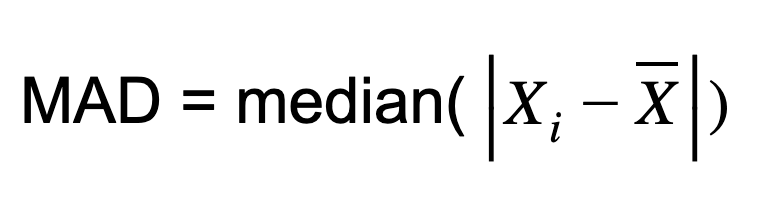

In [42]:
from scipy import stats

# MAD method
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [43]:
col_threshold = []
for col in year_month_list:
    outliers = mad_method(pivot_voice_usage_info, int(col))
    outlier_cols = pivot_voice_usage_info[int(col)].iloc[outliers]
    col_threshold.append({col: {"threshold" :min(outlier_cols), "count":len(outliers)}})
    print()
    print(f"Outliers for {col}---->\n", outlier_cols)
    print(len(outliers))

<ipython-input-42-ab658f4f8d27>:8: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  mad = np.abs(stats.median_absolute_deviation(df))
<ipython-input-42-ab658f4f8d27>:16: RuntimeWarning: divide by zero encountered in double_scalars
  t = (v-med[index])/mad[index]
<ipython-input-42-ab658f4f8d27>:16: RuntimeWarning: invalid value encountered in double_scalars
  t = (v-med[index])/mad[index]



Outliers for 201808---->
 event_source.hash
002fb47f60400713c854b0f69ff78c0a    0.1250
006be321aad541ff1d6c32a43dd7cdde    0.0625
009f305bf85a71012c0e343233e611ba    0.0625
00cc5a820586ce291c0fa4c2a99a4816    0.1250
0201ee9b60de662cdd16c885f178feea    0.0625
                                     ...  
fd168e1994367ee6261820bbc3e4d139    0.0625
fd73c12f6e91de550e829a823f85f600    0.1250
fe0bea5ee8cbf5765fb5d29e0423fdcc    0.2500
fe20b17a9573e4b7e765cc3098728f3d    1.0000
ff7e0f4edb7b39b683b9134af37fc4d3    0.7500
Name: 201808, Length: 431, dtype: float64
431

Outliers for 201809---->
 event_source.hash
009f305bf85a71012c0e343233e611ba    0.400000
00cc5a820586ce291c0fa4c2a99a4816    0.066667
0114c953f918a091d5b1456b610ae529    0.066667
011adeeaef79aeac706a2e7fc225e8f8    0.133333
0201ee9b60de662cdd16c885f178feea    0.800000
                                      ...   
fd73c12f6e91de550e829a823f85f600    0.800000
fe20b17a9573e4b7e765cc3098728f3d    0.800000
feebdc83f80ba16208b54c290247141


Outliers for 202007---->
 event_source.hash
009f305bf85a71012c0e343233e611ba    0.7500
029c7817843470cd12b4b673d95ef6e3    0.7500
0480fbc41f1ab2d73ea50c0dda53b89e    0.7500
04ec40da46c6ca65064a371a0a695f74    0.0625
05401b227d4dd007a258cd9fdad008f2    0.1250
                                     ...  
fd168e1994367ee6261820bbc3e4d139    0.5625
fdf4d7c06392afe91b2b230a72baab07    0.1250
fe20b17a9573e4b7e765cc3098728f3d    0.7500
ff7e0f4edb7b39b683b9134af37fc4d3    0.2500
ffd96f173d6cd683bf3384bdc2f99713    0.0625
Name: 202007, Length: 316, dtype: float64
316

Outliers for 202008---->
 event_source.hash
009f305bf85a71012c0e343233e611ba    0.7500
0152d7723febc8f6913e91db4887a75e    0.3750
029c7817843470cd12b4b673d95ef6e3    0.7500
0480fbc41f1ab2d73ea50c0dda53b89e    0.5000
04ec40da46c6ca65064a371a0a695f74    0.0625
                                     ...  
fa105c617fdebbe365b8cd6c4fd03884    0.0625
fd168e1994367ee6261820bbc3e4d139    0.3750
fe20b17a9573e4b7e765cc3098728f3d    0.0625
ff7e

In [44]:
col_threshold

[{201808: {'threshold': 0.0625, 'count': 431}},
 {201809: {'threshold': 0.06666666666666667, 'count': 499}},
 {201810: {'threshold': 0.08333333333333333, 'count': 574}},
 {201811: {'threshold': 0.08333333333333333, 'count': 294}},
 {201812: {'threshold': 0.0625, 'count': 462}},
 {201901: {'threshold': 0.0625, 'count': 460}},
 {201902: {'threshold': 0.08333333333333333, 'count': 416}},
 {201903: {'threshold': 0.08333333333333333, 'count': 487}},
 {201904: {'threshold': 0.08333333333333333, 'count': 628}},
 {201905: {'threshold': 0.0625, 'count': 511}},
 {201906: {'threshold': 0.0625, 'count': 526}},
 {201907: {'threshold': 0.08333333333333333, 'count': 503}},
 {201908: {'threshold': 0.08333333333333333, 'count': 475}},
 {201909: {'threshold': 0.08333333333333333, 'count': 453}},
 {201910: {'threshold': 0.0625, 'count': 448}},
 {201911: {'threshold': 0.08333333333333333, 'count': 408}},
 {201912: {'threshold': 0.0625, 'count': 417}},
 {202001: {'threshold': 0.0625, 'count': 475}},
 {2020

In [45]:
sum_outlier = 0
for col in col_threshold:
    for key,val in col.items():
        sum_outlier += val["threshold"]
avg_outlier = sum_outlier / len(col_threshold)
pivot_voice_usage_info["Outlier"]=pivot_voice_usage_info.apply(lambda x : "YES" if x["Usage_Rating_Scaled"]> avg_outlier else "NO", axis=1)
print(avg_outlier)

0.07349999999999998


In [46]:
pivot_voice_usage_info

year-month,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,...,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier
event_source.hash,,,,,,,,,,,,,,,,,,,,,
002fb47f60400713c854b0f69ff78c0a,0.1250,0.000000,0.000000,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,0.0000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0625,0.0000,0.0000,0.012500,NO
006be321aad541ff1d6c32a43dd7cdde,0.0625,0.000000,0.000000,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,0.0000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.002500,NO
007400db8afa996e788d23986739f3db,0.0000,0.000000,0.000000,0.000000,0.0625,0.1250,0.00,0.083333,0.083333,0.0625,...,0.0000,0.083333,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.045833,NO
00768613dcde5cd5723a25a7234b9a9f,0.0000,0.000000,0.000000,0.000000,0.0625,0.1250,0.00,0.166667,0.000000,0.1250,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.019167,NO
009f305bf85a71012c0e343233e611ba,0.0625,0.400000,1.000000,0.166667,0.7500,0.7500,0.75,1.000000,0.750000,0.5625,...,0.7500,1.000000,0.750000,0.000000,0.500000,0.7500,0.7500,0.7500,0.687667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff1093d5ef61bf46f8c88e9b7614e311,0.0000,0.000000,0.000000,0.166667,0.0000,0.0000,0.00,0.000000,0.000000,0.0000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.006667,NO
ff445f580f7525bd9f1455d6b09704cd,0.0000,0.000000,0.000000,0.000000,0.0000,0.0625,0.00,0.083333,0.166667,0.0000,...,0.0000,0.166667,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.021667,NO
ff7e0f4edb7b39b683b9134af37fc4d3,0.7500,0.800000,1.000000,0.000000,0.7500,0.7500,1.00,1.000000,1.000000,0.7500,...,0.2500,1.000000,1.000000,1.000000,1.000000,0.7500,0.2500,0.7500,0.802000,YES


In [47]:
# labling usage bins
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_voice_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_voice_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_voice_usage_info

year-month,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,...,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,,,,,,,
002fb47f60400713c854b0f69ff78c0a,0.1250,0.000000,0.000000,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0625,0.0000,0.0000,0.012500,NO,LOW
006be321aad541ff1d6c32a43dd7cdde,0.0625,0.000000,0.000000,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.002500,NO,LOW
007400db8afa996e788d23986739f3db,0.0000,0.000000,0.000000,0.000000,0.0625,0.1250,0.00,0.083333,0.083333,0.0625,...,0.083333,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.045833,NO,LOW
00768613dcde5cd5723a25a7234b9a9f,0.0000,0.000000,0.000000,0.000000,0.0625,0.1250,0.00,0.166667,0.000000,0.1250,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.019167,NO,LOW
009f305bf85a71012c0e343233e611ba,0.0625,0.400000,1.000000,0.166667,0.7500,0.7500,0.75,1.000000,0.750000,0.5625,...,1.000000,0.750000,0.000000,0.500000,0.7500,0.7500,0.7500,0.687667,YES,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff1093d5ef61bf46f8c88e9b7614e311,0.0000,0.000000,0.000000,0.166667,0.0000,0.0000,0.00,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.006667,NO,LOW
ff445f580f7525bd9f1455d6b09704cd,0.0000,0.000000,0.000000,0.000000,0.0000,0.0625,0.00,0.083333,0.166667,0.0000,...,0.166667,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.021667,NO,LOW
ff7e0f4edb7b39b683b9134af37fc4d3,0.7500,0.800000,1.000000,0.000000,0.7500,0.7500,1.00,1.000000,1.000000,0.7500,...,1.000000,1.000000,1.000000,1.000000,0.7500,0.2500,0.7500,0.802000,YES,HIGH


In [48]:
# adding category "NO" 
pivot_voice_usage_info['Usage_Rating_Categorical'] = pivot_voice_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_voice_usage_info.loc[pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
pivot_voice_usage_info[(pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0)]

year-month,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,...,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,,,,,,,


## Combining other features

In [58]:
combined_df = voice_usage_info[["event_source.hash","incoming_country"]]

In [59]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18607 entries, 0 to 18606
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  18607 non-null  object
 1   incoming_country   18607 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [60]:
combined_df = combined_df.groupby('event_source.hash', as_index=False).agg(list)

In [61]:
combined_df["incoming_country"] = combined_df["incoming_country"].apply(lambda x:  list(set(x)))

In [62]:
combined_df

,event_source.hash,incoming_country
0,002fb47f60400713c854b0f69ff78c0a,"[PTCL/Pakistan Incoming II, DU/UAE Incoming II]"
1,006be321aad541ff1d6c32a43dd7cdde,[PTCL/Pakistan Incoming II]
2,007400db8afa996e788d23986739f3db,"[Vovida/UK Incoming II, Orange/France Incoming..."
3,00768613dcde5cd5723a25a7234b9a9f,"[HGC/HK Incoming II, TATA/Canada Incoming II, ..."
4,009f305bf85a71012c0e343233e611ba,"[TIS/Italy Incoming II, HGC/HK Incoming II, IV..."
...,...,...
1627,ff1093d5ef61bf46f8c88e9b7614e311,[Orange/France Incoming II]
1628,ff445f580f7525bd9f1455d6b09704cd,"[HGC/HK Incoming II, DU/UAE Incoming II]"
1629,ff7e0f4edb7b39b683b9134af37fc4d3,"[Singtel/ SP Incoming II, Platinum Incoming II..."
1630,ffb4fa6778bc5b3d9c858f5f4fa1e0c2,"[Orange/France Incoming II, STC/Saudi Arabia I..."


In [63]:
combined_df.to_csv("data/user_profile/VOICE_IDD_Incoming_Country_and_Revenue.csv")

In [64]:
pivot_voice_usage_info_combined = pivot_voice_usage_info.merge(combined_df, how="left",on="event_source.hash")

In [65]:
pivot_voice_usage_info_combined

,event_source.hash,201808,201809,201810,201811,201812,201901,201902,201903,201904,...,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical,incoming_country
0,002fb47f60400713c854b0f69ff78c0a,0.1250,0.000000,0.000000,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0625,0.0000,0.0000,0.012500,NO,LOW,"[PTCL/Pakistan Incoming II, DU/UAE Incoming II]"
1,006be321aad541ff1d6c32a43dd7cdde,0.0625,0.000000,0.000000,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.002500,NO,LOW,[PTCL/Pakistan Incoming II]
2,007400db8afa996e788d23986739f3db,0.0000,0.000000,0.000000,0.000000,0.0625,0.1250,0.00,0.083333,0.083333,...,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.045833,NO,LOW,"[Vovida/UK Incoming II, Orange/France Incoming..."
3,00768613dcde5cd5723a25a7234b9a9f,0.0000,0.000000,0.000000,0.000000,0.0625,0.1250,0.00,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.019167,NO,LOW,"[HGC/HK Incoming II, TATA/Canada Incoming II, ..."
4,009f305bf85a71012c0e343233e611ba,0.0625,0.400000,1.000000,0.166667,0.7500,0.7500,0.75,1.000000,0.750000,...,0.750000,0.000000,0.500000,0.7500,0.7500,0.7500,0.687667,YES,HIGH,"[TIS/Italy Incoming II, HGC/HK Incoming II, IV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,ff1093d5ef61bf46f8c88e9b7614e311,0.0000,0.000000,0.000000,0.166667,0.0000,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.006667,NO,LOW,[Orange/France Incoming II]
1628,ff445f580f7525bd9f1455d6b09704cd,0.0000,0.000000,0.000000,0.000000,0.0000,0.0625,0.00,0.083333,0.166667,...,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.021667,NO,LOW,"[HGC/HK Incoming II, DU/UAE Incoming II]"
1629,ff7e0f4edb7b39b683b9134af37fc4d3,0.7500,0.800000,1.000000,0.000000,0.7500,0.7500,1.00,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.7500,0.2500,0.7500,0.802000,YES,HIGH,"[Singtel/ SP Incoming II, Platinum Incoming II..."
1630,ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,...,0.083333,0.000000,0.000000,0.0000,0.0000,0.0000,0.006667,NO,LOW,"[Orange/France Incoming II, STC/Saudi Arabia I..."


### No of outliers

In [66]:
pivot_voice_usage_info_combined["Outlier"].value_counts()

NO     1192
YES     440
Name: Outlier, dtype: int64

In [67]:
pivot_voice_usage_info_combined.to_csv("data/user_profile/VOICE_IDD_Incoming_Usage_Categorical.csv")

# Phase 2

## Binnig by Location 

- 1. group by location columns
- 2. Bin by location and get counts

In [68]:
voice_usage_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18607 entries, 0 to 18606
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  18607 non-null  object
 1   year-month         18607 non-null  int64 
 2   incoming_country   18607 non-null  object
 3   call_count         18607 non-null  int64 
 4   duration           18607 non-null  int64 
 5   event_type_id      18607 non-null  int64 
 6   RTOM_CODE          18607 non-null  object
 7   LOCATION_CODE      18607 non-null  object
 8   MSAN               18607 non-null  object
 9   EQUP_ID            18607 non-null  int64 
 10  MODEL              18607 non-null  object
 11  EQUP_INDEX         18607 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.5+ MB


In [69]:
# bucketing by location
voice_location_info = voice_usage_info
voice_location_info['Location_Identifier'] = voice_location_info['MSAN'].astype(str)+ voice_location_info['LOCATION_CODE'].astype(str) +voice_location_info['EQUP_ID'].astype(str) +voice_location_info['EQUP_INDEX'].astype(str)
voice_location_info

,event_source.hash,year-month,incoming_country,call_count,duration,event_type_id,RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,MODEL,EQUP_INDEX,Location_Identifier
0,40316888f773134364ae711ebdfdc791,201901,Telstra/Australia Incoming II,3,681,6,R-RM,MV-GDM-NODE,MSAG5200-ISL,48249,MSAN-OG,1,MSAG5200-ISLMV-GDM-NODE482491
1,40316888f773134364ae711ebdfdc791,201904,STC/Saudi Arabia Incoming II,1,219,6,R-RM,MV-GDM-NODE,MSAG5200-ISL,48249,MSAN-OG,1,MSAG5200-ISLMV-GDM-NODE482491
2,40316888f773134364ae711ebdfdc791,201906,CTGL/China Incoming II,1,11,6,R-RM,MV-GDM-NODE,MSAG5200-ISL,48249,MSAN-OG,1,MSAG5200-ISLMV-GDM-NODE482491
3,c3db6a32b42743fc2e0284f8e6c7515e,201912,STC/Saudi Arabia Incoming II,1,15,6,R-AG,AG-PNP-NODE,ZXDSL9806H-ISL,52976,MSAN-OP,1,ZXDSL9806H-ISLAG-PNP-NODE529761
4,c3db6a32b42743fc2e0284f8e6c7515e,201904,Telstra/Australia Incoming II,2,56,6,R-AG,AG-PNP-NODE,ZXDSL9806H-ISL,52976,MSAN-OP,1,ZXDSL9806H-ISLAG-PNP-NODE529761
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18602,c65cbf44d0aa63364dd7344813454e74,201904,DU/UAE Incoming II,1,8,6,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,MSAN-OG,1,MSAG5200-ISLMT-AVR-NODE467161
18603,c65cbf44d0aa63364dd7344813454e74,201905,HGC/HK Incoming II,1,6,6,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,MSAN-OG,1,MSAG5200-ISLMT-AVR-NODE467161
18604,c65cbf44d0aa63364dd7344813454e74,201903,Telstra/Australia Incoming II,1,6,6,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,MSAN-OG,1,MSAG5200-ISLMT-AVR-NODE467161
18605,c65cbf44d0aa63364dd7344813454e74,201811,Orange/France Incoming II,1,2,6,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,MSAN-OG,1,MSAG5200-ISLMT-AVR-NODE467161


In [70]:
voice_location_info = voice_location_info.drop_duplicates("event_source.hash", keep="last")
voice_location_info.shape

(1632, 13)

In [71]:
user_location = voice_location_info[['event_source.hash','Location_Identifier']]
user_location

,event_source.hash,Location_Identifier
9,ab97314f71804f7cc9fe63ab40d25d01,MSAG5200-ISLMV-GDM-NODE482491
27,cef84770b5a3e8218ff661fbb0fc235e,MSAG5200-ISLGE-NODE5577981
75,54836a6361cb0a0314be9cd45b2468d5,UA5000(IPMB)SL-NODE385341
79,e4cd0300f9531314bf68bb2910ef624b,MSAG5200PH-AKG-NODE431631
90,1d6f0ffdce6d98064083dcd7b2d4db13,MSAG5200PH-AKG-NODE431631
...,...,...
18562,2bc50f99b5505e3568051710e0c6fad0,MSAG5200-ISLND-PHG-NODE500241
18578,98ebe3ef6b529e060854170f2119f274,MSAG5200-ISLMT-AVR-NODE467161
18580,46dc42814032143f31fdc05d02bd199f,MSAG5200-ISLMT-AVR-NODE467161
18581,0f0dc20d9945732a5678466107b5e854,MSAG5200-ISLMT-AVR-NODE467161


In [72]:
user_location.to_csv("data/user_profile/VOICE_IDD_INCOMING_Locations_of_Users.csv")

In [73]:
voice_location_info["User_Count"] = 1
voice_gropued_by_locations = voice_location_info.groupby(['Location_Identifier'], axis=0,as_index=False).sum()
voice_gropued_by_locations = voice_gropued_by_locations[['Location_Identifier','User_Count']]

<ipython-input-73-46e54884d952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_location_info["User_Count"] = 1


In [74]:
voice_gropued_by_locations

,Location_Identifier,User_Count
0,C300MHE-DMD-NODE15221561,7
1,C300MHT-NE-NODE8152461,8
2,C300MIDH-IDJ-NODE11065541,40
3,C300MKI-NODE10668164,63
4,C300MNW-MEE-NODE18887751,47
5,C300MPDT-NODE13379431,1
6,C300MTP-NODE8700911,9
7,C300MVH-NODE9874041,2
8,MA5603TAD-SRV-NODE10224991,4
9,MSAG5200-ISLBZ-NODE435881,48


In [75]:
voice_gropued_by_locations.to_csv("data/user_profile/VOICE_IDD_Users_Count_by_Location.csv")

<AxesSubplot:>

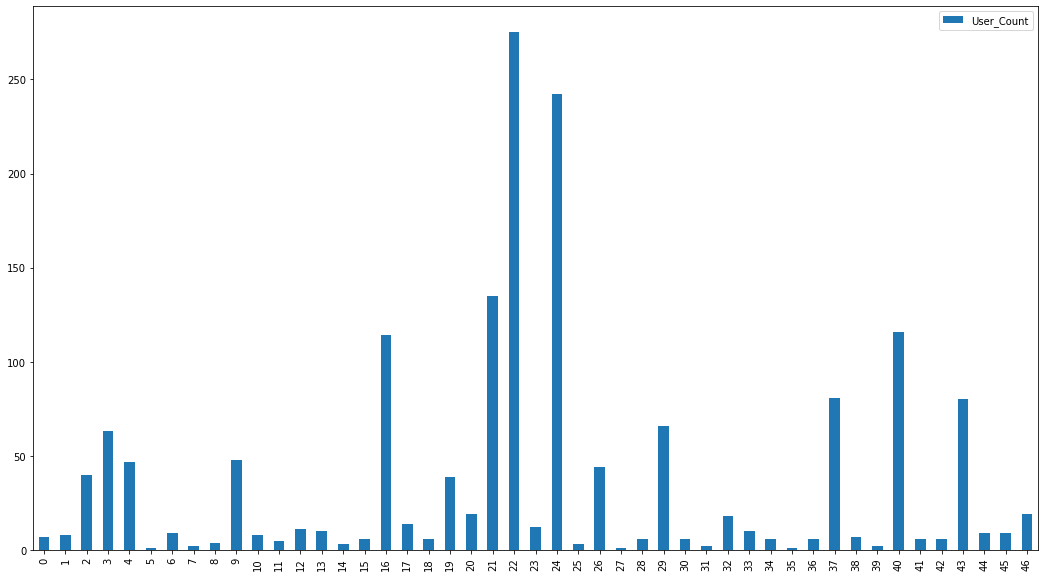

In [76]:
voice_gropued_by_locations.plot(kind="bar", figsize=(18,10),xticks=voice_gropued_by_locations.index)